In [1]:
import cv2
import argparse
import matplotlib.pyplot as plt

Stitching completed successfully. Stitched image saved as stitched_image.jpg


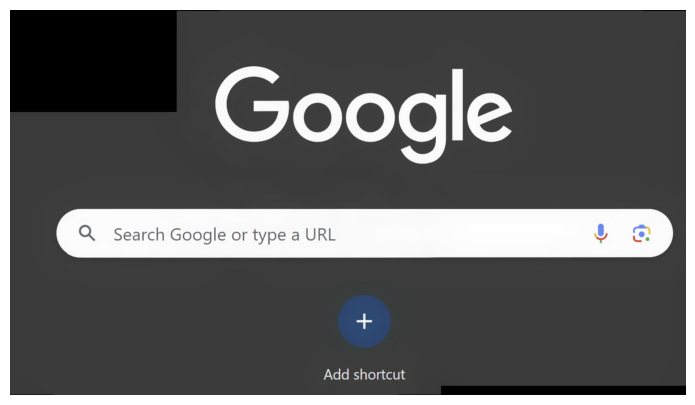

In [5]:
def stitch_images(image_paths, output_path='result.jpg'):
    """
    Stitches a list of images together using OpenCV's Stitcher API without specifying a mode.

    Args:
        image_paths (list): A list of paths to the input images.
        output_path (str, optional): The path to save the stitched image. Defaults to 'result.jpg'.

    Returns:
        bool: True if the stitching was successful, False otherwise.
        numpy.ndarray: The stitched image.
    """
    # Read input images
    imgs = []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Failed to read image {img_path}")
            continue
        imgs.append(img)

    # Create a stitcher instance and stitch the images
    stitcher = cv2.Stitcher.create()
    status, pano = stitcher.stitch(imgs)

    if status != cv2.Stitcher_OK:
        print(f"Error: Failed to stitch images, error code = {status}")
        return False, None

    # Save the stitched image
    cv2.imwrite(output_path, pano)
    print(f"Stitching completed successfully. Stitched image saved as {output_path}")

    return True, pano

# Example usage
image_paths = ['img1.png', 'img2.png']
success, stitched_image = stitch_images(image_paths, output_path='stitched_image.jpg')

if success:
    # Display the stitched image using matplotlib.pyplot
    plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(stitched_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()